# Machine Learning Lab 1

## Assignment 2 (Deadline : 4/12/2022 11:59PM)

Total Points : 100

Your answers must be entered in LMS by midnight of the day it is due. 

If the question requires a textual response, you can create a PDF and upload that. 

The PDF might be generated from MS-WORD, LATEX, the image of a hand- written response, or using any other mechanism. 

Code must be uploaded and may require demonstration to the TA. 

Numbers in the parentheses indicate points allocated to the question. 

**Naming Convention**: FirstName_LastName_Lab2_TLP23.ipynb

# Question 1 (50 points)

## 1. Read the data into a numpy array

In [264]:
import numpy as np
import pandas as pd
from numpy import genfromtxt# import the necessary libraries
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import ElasticNet

In [265]:
# Read data from file: 'data.csv'. 
# Note that the first row has the number of inputs and number of outputs specified.
# For your reference: you can use "np.loadtxt".


import numpy as np
import pandas as pd

df = pd.read_csv('data.csv')
a = df.index.tolist()
df['feature1'] = a
df.rename(columns={'2':'feature2','1':'target'}, inplace=True)
df.index = range(1, 3001, 1)




In [266]:
from sklearn.model_selection import train_test_split
X = df[['feature1','feature2']]
y = df['target']






## 2. Plot and explore the data to get a better understanding

In [267]:
# EDA
#Target Distribution
import plotly.express as px
fig = px.histogram(x=df['target'])
fig.show()

## 3. Prepare the data for modelling

In [268]:
# Perform a train-val-test split of 60-20-20.
# Use "random_state=42".
# For your reference: you can use "train_test_split" from sklearn twice to perform this. 


# Separate the data: input and output.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2



 * From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not?


## 4. Modelling

### 4.1 Linear Regression

In [269]:
# Implement Linear Regression.
# Use both train and val data for training purpose.
# Make preditions on both training(train+val) and test data.

regr = LinearRegression()
regr.fit(X_train, y_train)
#Linear_train= regr.predict(X_train)
Linear_test = regr.predict(X_test)

print("Test accuracy :",regr.score(X_test, y_test))
print("Train accuracy",regr.score(X_train, y_train))


import plotly.express as px
fig = px.scatter(x=y_test, y=Linear_test)
fig.update_layout(
    height=400,
    title_text='X axis : Actual Values Y axis : Predicted Values'
)
fig.show()

Test accuracy : 0.951393653409172
Train accuracy 0.9472582424774998


### 4.2 Ridge Reegression

In [270]:
# Implement Ridge Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.


#List for scoring the mean of cross-validation score 
score_list = [] 
#cv = 4, since the default method for cross-validation in K-fold
#It will divide our Intial training data into training data and validation data in the ratio 3:1
#Hyperparameter tuning
#alpha = np.linspace(1, 80, 100)
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for i in alpha:
  ridge = Ridge(i)
  scores = cross_val_score(ridge, X_train, y_train, cv=4)
  score_list.append(scores.mean())



max_index = score_list.index(max(score_list))
best_value = alpha[max_index]


#Training the train data on the optimum value of alpha
model_rr = Ridge(best_value)
model_rr.fit(X_train,y_train)

print("The best value for alpha", best_value )

#Testing on test set
print("The accuracy on Test ", model_rr.score(X_test, y_test))
#Testing on train set
print("The accuracy on Train",model_rr.score(X_train,y_train))

#Cross validation mean accuracy
print("Mean cross Validation accuracy", max(score_list) )



The best value for alpha 0.0001
The accuracy on Test  0.9513936534090409
The accuracy on Train 0.9472582424774998
Mean cross Validation accuracy 0.947008770271751


### 4.3 Lasso Regression

In [271]:
# Implement Lasso Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.


score_list1 = [] 
#cv = 4, since the default method for cross-validation in K-fold
#It will divide our Intial training data into training data and validation data in the ratio 3:1
#Hyperparameter tuning
alpha1 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for i in alpha1:
  lasso = Lasso(i)
  scores = cross_val_score(lasso, X_train, y_train, cv=4)
  score_list1.append(scores.mean())



max_ind = score_list1.index(max(score_list1))
best_val = alpha1[max_ind]


#Training the train data on the optimum value of alpha
model_lr = Ridge(best_val)
model_lr.fit(X_train,y_train)

print("The best value for alpha", best_value )

#Testing on test set
print("The accuracy on Test ", model_lr.score(X_test, y_test))
#Testing on train set
print("The accuracy on Train",model_lr.score(X_train,y_train))

#Cross validation mean accuracy
print("Mean Cross Validation score", max(score_list1) )



The best value for alpha 0.0001
The accuracy on Test  0.9513936520973207
The accuracy on Train 0.9472582424774437
Mean Cross Validation score 0.9470087955633715


### 4.4 ElasticNet Regression

In [272]:
# Implement ElasticNet Regression.
# Perform cross validation to find a good value for your hyper-parameters.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.

#Using GridsearchCV for this regression

parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

model_en = ElasticNet()
grid = GridSearchCV(model_en, parameters, cv=4)
grid.fit(X_train, y_train)


print("The accuracy on Test ", grid.score(X_test, y_test))
print("The accuracy on Test ", grid.score(X_train, y_train))

print(grid.best_params_)



The accuracy on Test  0.951393653329002
The accuracy on Test  0.947258242477499
{'alpha': 0.0001}


## 5. Analysis

In [273]:
# Write down the actual value along with the preditions from all the regression models, for the first 10 points in test data.

#Linear Regression:

dict = {'Actual Values': y_test[:10].tolist(),
        'LR Prediction': regr.predict(X_test[:10]),
        'Ridge Prediction': model_rr.predict(X_test[:10]),
        'Lasso Prediction': model_lr.predict(X_test[:10]),
         'Elasticnet Prediction': grid.predict(X_test[:10]) } 
  
# creating a dataframe from a dictionary  

df = pd.DataFrame(dict) 

print(df)

   Actual Values  LR Prediction  Ridge Prediction  Lasso Prediction  Elasticnet Prediction
0          66.12      61.235630         61.235630         61.235624              61.235629
1        -572.89    -576.474002       -576.474002       -576.474023            -576.474001
2         -94.71    -112.489283       -112.489283       -112.489297            -112.489284
3        -306.84    -413.460170       -413.460170       -413.460033            -413.460155
4         580.10     602.521612        602.521612        602.521358             602.521584
5         -34.05     -19.808152        -19.808152        -19.808103             -19.808148
6         -81.37    -172.968197       -172.968197       -172.968100            -172.968187
7         552.60     601.278257        601.278257        601.278079             601.278237
8         -24.39     -42.406417        -42.406417        -42.406532             -42.406428
9         538.47     558.283905        558.283905        558.283791             558.283890

In [274]:
# Find both RMSE and MAE for all the regression models on both training(train+val) and testing data.

#Linear Regression :


models = [regr, model_rr, model_lr, grid]

test =  []
train = []
for model in models:
  r = []
  f = []
  r.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
  r.append(mean_absolute_error(y_test, model.predict(X_test)))
  
  f.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
  f.append(mean_absolute_error(y_train, model.predict(X_train)))
  
  test.append(r), train.append(f)


test_data = {
    'Linear Regression':test[0],
    'Ridge' :test[1],
    'Lasso':test[2],
    'Elasticnet':test[3]}
index_labels=['RMSE','MAE']
df1 = pd.DataFrame(test_data,index=index_labels)
print("--------Test Data --------- \n",df1,"\n")

train_data = {
    'Linear Regression':train[0],
    'Ridge' :train[1],
    'Lasso':train[2],
    'Elasticnet':train[3]}
index_labels=['RMSE','MAE']
df2 = pd.DataFrame(train_data,index=index_labels)
print("-------Train data --------- \n",df2)



--------Test Data --------- 
       Linear Regression       Ridge       Lasso  Elasticnet
RMSE         148.473880  148.473880  148.473882  148.473880
MAE          118.728665  118.728665  118.728670  118.728666 

-------Train data --------- 
       Linear Regression       Ridge       Lasso  Elasticnet
RMSE         151.587564  151.587564  151.587564  151.587564
MAE          120.779893  120.779893  120.779896  120.779894


## 6. Final Observations
Write down your final conclusions and observations

In [274]:
#1st Observation : 
#The results obtained from all the 4 models were similarand thus using Linear Regression is enough

#2 Observation
#Took the value of cv=4 so as to maintain the train:valid:test ration --> 60:20:20
#Cross validation by default uses K fold, where our data was trained on 3 splits and tested(validated) 
#on the 4th split. For each value of alpha this experiment was perfomed 4 times and the mean of score
#was taken in order to derive the best alpha value among a set of considered alpha value list

# Question 2 (30 points)

Given the automobile dataset at https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv , 

## 1. Load and examine the dataset

In [275]:
data = pd.read_csv('automobileEDA.csv')
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [276]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [277]:
#Replacing the Nan values with median value and string
missing = data.columns[data.isnull().any()] 
for column in missing:
    print(column, data[column].isnull().sum())


data['stroke']=data['stroke'].fillna(data['stroke'].median())
data['horsepower-binned'] = data['horsepower-binned'].fillna('four')

stroke 4
horsepower-binned 1


In [278]:
corr = data.corr()
corr['city-mpg'].sort_values().abs()
#Removing the highly corelated features with the target
data.drop(['city-L/100km', 'highway-mpg' ], axis=1, inplace=True)



In [279]:
data

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,13495.0,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,16500.0,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,13950.0,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,17450.0,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,16845.0,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,19045.0,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,21485.0,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,22470.0,Medium,1,0


In [280]:
#cor = data.corr()
#Removing the features that are corelated 

#Alraedy implemented and saved the list and dropping everything
#for the target value



#corr_matrix = data.corr().abs()
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# to_drop = ['length',
#  'width',
#  'curb-weight',
#  'engine-size',
#  'horsepower',
#  'price',
#  'diesel',
#  'gas']

#Reasons for dropping a few of the features was because of the correlation between them

to_drop = ['length',
 'curb-weight',
 'engine-size',
 'horsepower',
 'price',
 'gas']



# Drop features 
data.drop(to_drop, axis=1, inplace=True)
data

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,width,height,engine-type,num-of-cylinders,fuel-system,bore,stroke,compression-ratio,peak-rpm,city-mpg,horsepower-binned,diesel
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.890278,48.8,dohc,four,mpfi,3.47,2.68,9.0,5000.0,21,Medium,0
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.890278,48.8,dohc,four,mpfi,3.47,2.68,9.0,5000.0,21,Medium,0
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.909722,52.4,ohcv,six,mpfi,2.68,3.47,9.0,5000.0,19,Medium,0
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.919444,54.3,ohc,four,mpfi,3.19,3.40,10.0,5500.0,24,Medium,0
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.922222,54.3,ohc,five,mpfi,3.19,3.40,8.0,5500.0,18,Medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.956944,55.5,ohc,four,mpfi,3.78,3.15,9.5,5400.0,23,Medium,0
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.955556,55.5,ohc,four,mpfi,3.78,3.15,8.7,5300.0,19,High,0
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.956944,55.5,ohcv,six,mpfi,3.58,2.87,8.8,5500.0,18,Medium,0
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.956944,55.5,ohc,six,idi,3.01,3.40,23.0,4800.0,26,Medium,1


In [281]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler



X = data.drop(['city-mpg'],axis = 1)
y = data['city-mpg']
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Finding the numerical and categorical columns for
#Scaling the numerical values and encoding the Categorical values using the ColumnTransfer
num = list(X.select_dtypes(exclude='object').columns)
cat = X.select_dtypes(include='object').columns




In [282]:
transform = ColumnTransformer([('num', StandardScaler(), num),('cat',OneHotEncoder(), cat )])

#Scaling and encoding data 
X__train= transform.fit_transform(data_X_train)
X__test = transform.transform(data_X_test)

linear = LinearRegression()
linear.fit(X__train, data_y_train)

linear.score(X__test,data_y_test)

0.8431442287518776

In [283]:
y_predicted_ = linear.predict(X__test)

## 2. Visualise/Plot the regression model

In [284]:
import seaborn as sns
import plotly.express as px

fig = px.scatter(x=data_y_test, y=y_predicted_, trendline="ols")
fig.show()

## 3. Generate a Linear Regression equation

In [285]:
terms = linear.coef_

string = ""

for i in range(1,len(terms)+1):
  string = string +  "(" + str(terms[i-1])+ "*x_"+ str(i) + ")" + "+" + ""
  

string = string + str(linear.intercept_)

print(string)



(0.2801100066491874*x_1)+(-0.2818988565171547*x_2)+(-2.586920638715577*x_3)+(0.102096545203481*x_4)+(-0.3138119714678944*x_5)+(-2.0870378999534434*x_6)+(0.48461308675643777*x_7)+(6.3910502874245205*x_8)+(-1.682627740751101*x_9)+(-4.00650877882686*x_10)+(-7.948346092605198*x_11)+(-3.2150713909097495*x_12)+(4.523815208876639*x_13)+(7.69060085136951*x_14)+(1.0512603400194565*x_15)+(-2.634976863211352*x_16)+(-2.5652943998424185*x_17)+(2.9970923123779523*x_18)+(0.15255885165782238*x_19)+(-1.6788365342031237*x_20)+(3.741553201404037*x_21)+(1.228895153588707*x_22)+(1.3873330807054003*x_23)+(0.04631733415317954*x_24)+(1.1330237492088595*x_25)+(-2.7025173576189476*x_26)+(-3.90928122217051*x_27)+(-5.133146715678078*x_28)+(-0.4593159958101152*x_29)+(1.1575974050234326*x_30)+(-0.44125665798359354*x_31)+(5.577995741647971*x_32)+(1.2667274121231498*x_33)+(-1.2667274121232506*x_34)+(-0.21851635320887094*x_35)+(0.21851635320894272*x_36)+(-1.6298057493521525*x_37)+(-1.7281947327983966*x_38)+(0.88315096

## 4. Use a residual plot to inspect if LR fits the model

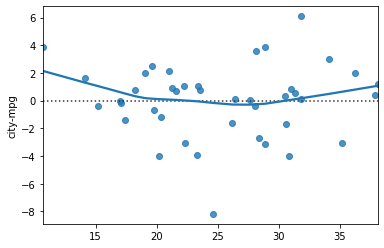

In [287]:
sns.residplot( x=y_predicted_, y=data_y_test - y_predicted_, lowess=True)

## 5. Use R2 and MSE to determine the accuracy of the LR fit 

In [288]:

print("The R2 score is :",linear.score(X__test,data_y_test))
print("The MSE is", mean_squared_error(data_y_test, y_predicted_))

The R2 score is : 0.8431442287518776
The MSE is 7.184946095244156


# Question 3 (20 points)

### In this assignment, you will experiment with a toy dataset – the Iris dataset.

## 1. Load the Iris dataset.

In [289]:
import numpy as np
#use -  sklearn.datasets.load_iris
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(csv_url, header = None)
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
iris =  pd.read_csv(csv_url, names = col_names)



In [290]:
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [291]:
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [292]:
iris['Species'] = iris['Species'].replace('Iris-setosa', 0)
iris['Species'] = iris['Species'].replace('Iris-versicolor', 0)
iris['Species'] = iris['Species'].replace('Iris-virginica', 1)
iris_X= iris.iloc[:,:-1]
iris_y = iris.iloc[:,-1]

## 3. Construct a training set and a testing set using 80-20 split using random sampling.

In [293]:
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size=0.2, random_state = 42)

## 4. Use Logistic Regression as a black box classifier and assess the performance.

In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=42).fit(train_X, train_y)

print(model.score(test_X, test_y))
confusion_matrix(test_y, model.predict(test_X))

1.0


array([[19,  0],
       [ 0, 11]])

## 5. Implement stratified sampling, again using the 80-20 split. Decide the stratification variable and explain your choice.

In [295]:
#Using Stratifying
X_train, X_test, Y_train, Y_test = train_test_split(iris_X, iris_y, test_size = 0.2, stratify=iris_y)
model = LogisticRegression().fit(train_X, train_y)

print(model.score(X_test, Y_test))
confusion_matrix(Y_test, model.predict(X_test))

0.9333333333333333


array([[19,  1],
       [ 1,  9]])

## 6. Re-assess the performance. Comment on any changes from the random sampling case. If there is no significant change, comment on why or why not?

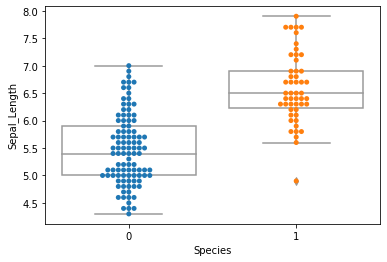

In [296]:
sns.boxplot(x = 'Species', y = 'Sepal_Length', data = iris, color = 'white')
sns.swarmplot(x = 'Species', y = 'Sepal_Length', data = iris)

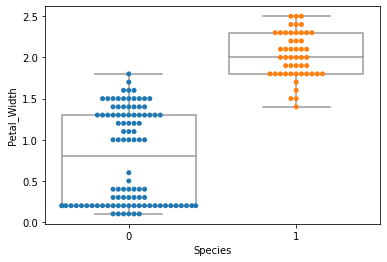

In [297]:
sns.boxplot(x = 'Species', y = 'Petal_Width', data = iris, color = 'white')
sns.swarmplot(x = 'Species', y = 'Petal_Width', data = iris)

It is easily visble from the above box plots that it has been intentionally asked to merge the setosa and versicolor classes as they are easily seperable.

My choice to take y (target_feature) as the statrifying variable was as simple as to test the model and see if the class imbalanced could be a factor. As in, merging two classes i.e setosa and versicolor leads to a class imbalance and leads to a ratio of 2:1 between the classes 0(setosa+versicolor) and 1(virginica).

At last, there was no significant change between the two models as the data was easily separable even with the presence of data imbalance. So Startifying method was not needed here.